In [1]:
# Import dataset
import pandas as pd
credit_card = r'/Users/brianwang/Desktop/default of credit card clients.csv'
df = pd.read_csv(credit_card, header=1)

# print structure
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Step 2: Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Step 3: Fill missing values using the median for numeric columns
df_cleaned = df.fillna(df.median(numeric_only=True))

# Step 4: Verify that all missing values are handled
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

Missing values before cleaning:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Missing values after cleaning:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                  

In [5]:
# Apply one-hot encoding to categorical variables
# Separate the target first before encoding
target = df['default payment next month']
df_features = df.drop(['ID', 'default payment next month'], axis=1)

# One-hot encode categorical features only
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df_encoded = pd.get_dummies(df_features, columns=categorical_cols, drop_first=True)

# Reattach the target
df_encoded['default payment next month'] = target

# Define X and y
X = df_encoded.drop('default payment next month', axis=1)
y = df_encoded['default payment next month']

df_encoded.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,False,True,False,False,False,False,True,False,False,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,False,True,False,False,False,False,False,True,False,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,False,True,False,False,False,False,False,True,False,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,False,True,False,False,False,False,True,False,False,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,False,True,False,False,False,False,True,False,False,0


In [9]:
# Add advanced feature engineering
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df['AVG_UTIL_RATIO'] = df[bill_cols].mean(axis=1) / df['LIMIT_BAL']
df['AVG_REPAY_RATIO'] = df[pay_amt_cols].mean(axis=1) / df[bill_cols].mean(axis=1)
df['PAY_TO_LIMIT'] = df[pay_amt_cols].mean(axis=1) / df['LIMIT_BAL']
df['NUM_DELAYS'] = df[pay_cols].gt(0).sum(axis=1)
df['LONGEST_DELAY'] = df[pay_cols].max(axis=1)
df['NUM_ZERO_PAYMENT_MONTHS'] = df[pay_amt_cols].eq(0).sum(axis=1)
df['CREDIT_LIMIT_RECENT_DELAY'] = df['LIMIT_BAL'] * df['PAY_0']
df['AGE_TIMES_PAYMENT'] = df['AGE'] * df['PAY_AMT1']

df.columns[-10:]

Index(['PAY_AMT6', 'default payment next month', 'AVG_UTIL_RATIO',
       'AVG_REPAY_RATIO', 'PAY_TO_LIMIT', 'NUM_DELAYS', 'LONGEST_DELAY',
       'NUM_ZERO_PAYMENT_MONTHS', 'CREDIT_LIMIT_RECENT_DELAY',
       'AGE_TIMES_PAYMENT'],
      dtype='object')

In [11]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,default payment next month,AVG_UTIL_RATIO,AVG_REPAY_RATIO,PAY_TO_LIMIT,NUM_DELAYS,LONGEST_DELAY,NUM_ZERO_PAYMENT_MONTHS,CREDIT_LIMIT_RECENT_DELAY,AGE_TIMES_PAYMENT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,1,0.064200,0.089434,0.005742,2,2,5,40000,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2000,1,0.023718,0.292791,0.006944,2,2,2,-120000,0
2,3,90000,2,2,2,34,0,0,0,0,...,5000,0,0.188246,0.108388,0.020404,0,0,0,0,51612
3,4,50000,2,2,1,37,0,0,0,0,...,1000,0,0.771113,0.036259,0.027960,0,0,0,0,74000
4,5,50000,1,2,1,57,-1,0,-1,0,...,679,0,0.364463,0.540054,0.196830,0,0,0,-50000,114000


In [13]:
# Check for missing values
df.isna().sum().sort_values(ascending=False)

AVG_REPAY_RATIO               795
ID                              0
BILL_AMT6                       0
CREDIT_LIMIT_RECENT_DELAY       0
NUM_ZERO_PAYMENT_MONTHS         0
LONGEST_DELAY                   0
NUM_DELAYS                      0
PAY_TO_LIMIT                    0
AVG_UTIL_RATIO                  0
default payment next month      0
PAY_AMT6                        0
PAY_AMT5                        0
PAY_AMT4                        0
PAY_AMT3                        0
PAY_AMT2                        0
PAY_AMT1                        0
BILL_AMT5                       0
LIMIT_BAL                       0
BILL_AMT4                       0
BILL_AMT3                       0
BILL_AMT2                       0
BILL_AMT1                       0
PAY_6                           0
PAY_5                           0
PAY_4                           0
PAY_3                           0
PAY_2                           0
PAY_0                           0
AGE                             0
MARRIAGE      

In [17]:
import numpy as np
# Step 1: Drop rows with missing AVG_REPAY_RATIO
df_cleaned = df.dropna(subset=['AVG_REPAY_RATIO'])

# Step 2: Drop 'ID' column 
df_cleaned.drop(columns=['ID'], inplace=True)

# Step 3: Remove any "inf" or "-inf"
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned.dropna(inplace=True)

# Final check
print("Shape after cleaning:", df_cleaned.shape)
print("Any missing values left?", df_cleaned.isna().sum().sum())


Shape after cleaning: (29130, 32)
Any missing values left? 0


/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_18584/1771934906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['ID'], inplace=True)
/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_18584/1771934906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_18584/1771934906.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [19]:
df_cleaned.isna().sum().sort_values(ascending=False)

LIMIT_BAL                     0
SEX                           0
CREDIT_LIMIT_RECENT_DELAY     0
NUM_ZERO_PAYMENT_MONTHS       0
LONGEST_DELAY                 0
NUM_DELAYS                    0
PAY_TO_LIMIT                  0
AVG_REPAY_RATIO               0
AVG_UTIL_RATIO                0
default payment next month    0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT2                     0
BILL_AMT1                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
AGE_TIME

In [21]:
df_cleaned.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,default payment next month,AVG_UTIL_RATIO,AVG_REPAY_RATIO,PAY_TO_LIMIT,NUM_DELAYS,LONGEST_DELAY,NUM_ZERO_PAYMENT_MONTHS,CREDIT_LIMIT_RECENT_DELAY,AGE_TIMES_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,0.064200,0.089434,0.005742,2,2,5,40000,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2000,1,0.023718,0.292791,0.006944,2,2,2,-120000,0
2,90000,2,2,2,34,0,0,0,0,0,...,5000,0,0.188246,0.108388,0.020404,0,0,0,0,51612
3,50000,2,2,1,37,0,0,0,0,0,...,1000,0,0.771113,0.036259,0.027960,0,0,0,0,74000
4,50000,1,2,1,57,-1,0,-1,0,0,...,679,0,0.364463,0.540054,0.196830,0,0,0,-50000,114000


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np

print("Mean of scaled features (X_train_scaled):\n", np.mean(X_train_scaled, axis=0))
print("\nStandard deviation of scaled features:\n", np.std(X_train_scaled, axis=0))

Mean of scaled features (X_train_scaled):
 [ 8.43769499e-17 -1.66977543e-16  7.84557604e-18 -2.75335310e-17
 -1.98359847e-17  1.16943492e-17 -4.76655752e-17 -2.66453526e-18
  4.20404452e-17 -9.32587341e-18  6.30606678e-17 -5.62512999e-17
  5.03301104e-17  6.30606678e-17 -1.18423789e-17 -1.50990331e-17
 -2.96059473e-19 -1.61352413e-17  7.10542736e-18  1.77635684e-17
  5.92118946e-19  8.02321172e-17  1.42108547e-17  5.15143483e-17
  1.53950926e-17  6.51330841e-18 -1.18423789e-18  6.03961325e-17
  8.19344592e-17  6.27646083e-17]

Standard deviation of scaled features:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Step 1: Split data
X = df_cleaned.drop(columns=['default payment next month'])
y = df_cleaned['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Retrain logistic regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy = log_model.score(X_test_scaled, y_test)
report = classification_report(y_test, y_pred_log)
auc = roc_auc_score(y_test, y_proba_log)
cm = confusion_matrix(y_test, y_pred_log)

print("Accuracy:", accuracy)
print("AUC Score:", auc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.8180569859251631
AUC Score: 0.769707134641501

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      4560
           1       0.67      0.32      0.44      1266

    accuracy                           0.82      5826
   macro avg       0.75      0.64      0.66      5826
weighted avg       0.80      0.82      0.79      5826


Confusion Matrix:
 [[4355  205]
 [ 855  411]]


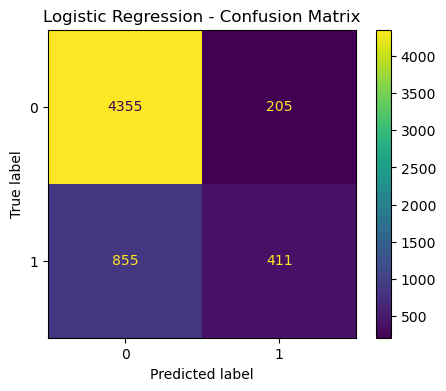

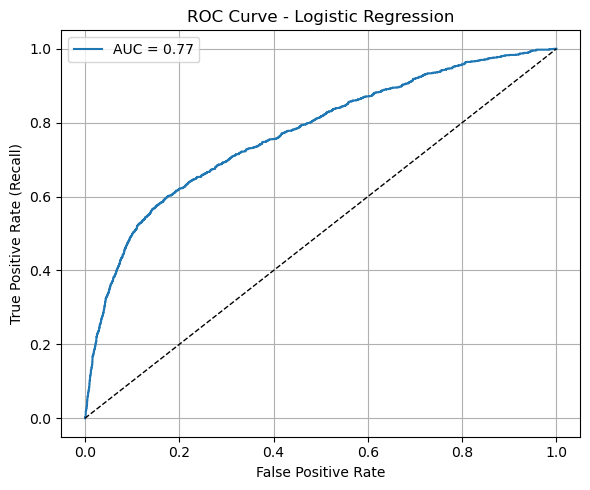

In [27]:
# Plot confusion matrix
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the resampled training set
scaler_smote = StandardScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_train_smote)
X_test_smote_scaled = scaler_smote.transform(X_test)  # scale original test set using same scaler

# Retrain logistic regression on SMOTE data
log_model_smote = LogisticRegression(max_iter=1000, random_state=42)
log_model_smote.fit(X_train_smote_scaled, y_train_smote)

# Predict on test set
y_pred_smote = log_model_smote.predict(X_test_smote_scaled)
y_proba_smote = log_model_smote.predict_proba(X_test_smote_scaled)[:, 1]

# Evaluation
accuracy_smote = log_model_smote.score(X_test_smote_scaled, y_test)
report_smote = classification_report(y_test, y_pred_smote)
auc_smote = roc_auc_score(y_test, y_proba_smote)
cm_smote = confusion_matrix(y_test, y_pred_smote)

print("Accuracy:", accuracy_smote)
print("AUC Score:", auc_smote)
print("\nClassification Report:\n", report_smote)
print("\nConfusion Matrix:\n", cm_smote)

Accuracy: 0.7360109852385857
AUC Score: 0.7401824194174219

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      4560
           1       0.43      0.62      0.51      1266

    accuracy                           0.74      5826
   macro avg       0.65      0.70      0.66      5826
weighted avg       0.78      0.74      0.75      5826


Confusion Matrix:
 [[3499 1061]
 [ 477  789]]


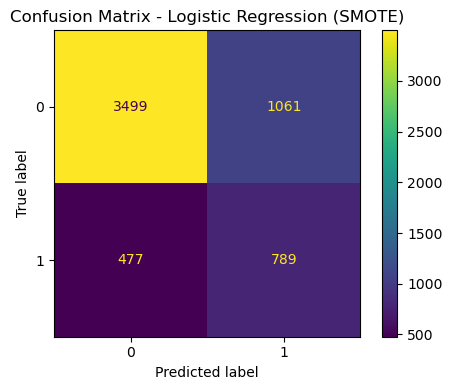

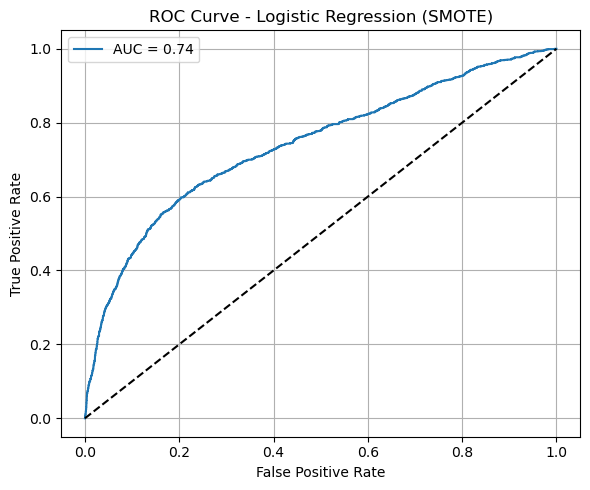

In [31]:
# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=log_model_smote.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.tight_layout()
plt.show()

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_proba_smote)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train a decision tree classifier on the non-SMOTE data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_dt = dt_model.score(X_test_scaled, y_test)
report_dt = classification_report(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("AUC Score:", auc_dt)
print("\nClassification Report:\n", report_dt)
print("\nConfusion Matrix:\n", cm_dt)

Accuracy: 0.7310332990044628
AUC Score: 0.6136375446911116

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      4560
           1       0.39      0.41      0.40      1266

    accuracy                           0.73      5826
   macro avg       0.61      0.61      0.61      5826
weighted avg       0.74      0.73      0.73      5826


Confusion Matrix:
 [[3745  815]
 [ 752  514]]


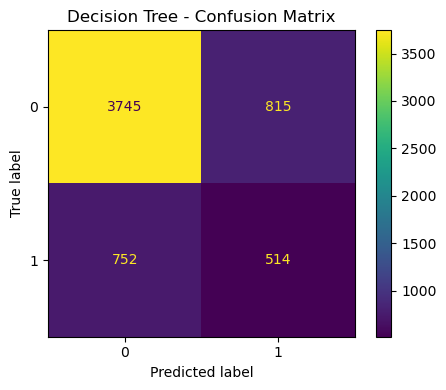

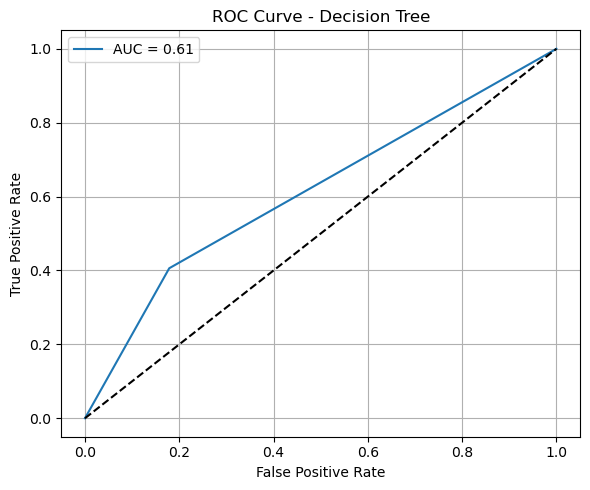

In [35]:
# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_dt:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Apply SMOTE to training data for Decision Tree
from imblearn.over_sampling import SMOTE

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_train_dt_smote, y_train_dt_smote = smote.fit_resample(X_train, y_train)

# Scale the resampled training set
scaler_dt_smote = StandardScaler()
X_train_dt_smote_scaled = scaler_dt_smote.fit_transform(X_train_dt_smote)
X_test_dt_scaled = scaler_dt_smote.transform(X_test)

# Train Decision Tree on SMOTE data
dt_smote_model = DecisionTreeClassifier(random_state=42)
dt_smote_model.fit(X_train_dt_smote_scaled, y_train_dt_smote)

# Predict and evaluate
y_pred_dt_smote = dt_smote_model.predict(X_test_dt_scaled)
y_proba_dt_smote = dt_smote_model.predict_proba(X_test_dt_scaled)[:, 1]

accuracy_dt_smote = dt_smote_model.score(X_test_dt_scaled, y_test)
report_dt_smote = classification_report(y_test, y_pred_dt_smote)
auc_dt_smote = roc_auc_score(y_test, y_proba_dt_smote)
cm_dt_smote = confusion_matrix(y_test, y_pred_dt_smote)

print("Accuracy:", accuracy_dt_smote)
print("AUC Score:", auc_dt_smote)
print("\nClassification Report:\n", report_dt_smote)
print("\nConfusion Matrix:\n", cm_dt_smote)

Accuracy: 0.6889804325437693
AUC Score: 0.6195825018707907

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      4560
           1       0.35      0.50      0.41      1266

    accuracy                           0.69      5826
   macro avg       0.60      0.62      0.60      5826
weighted avg       0.73      0.69      0.71      5826


Confusion Matrix:
 [[3385 1175]
 [ 637  629]]


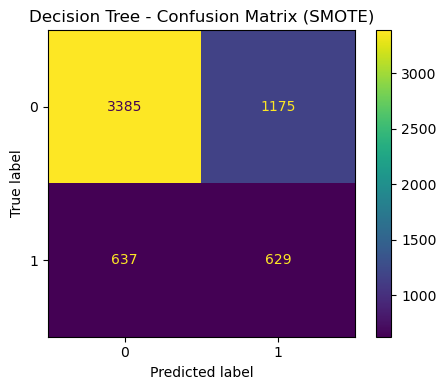

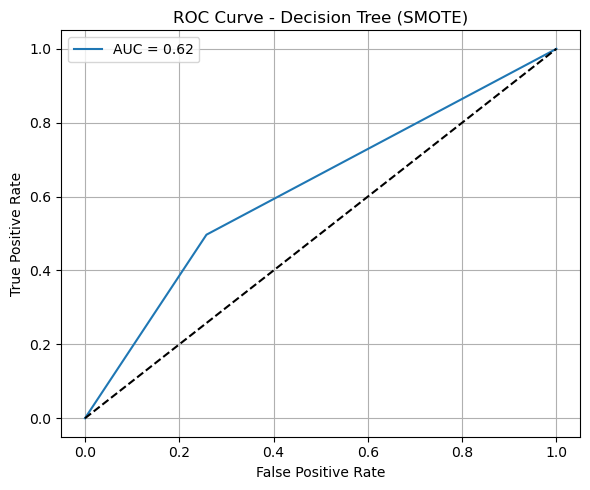

In [39]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt_smote, display_labels=dt_smote_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Decision Tree - Confusion Matrix (SMOTE)")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt_smote)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_dt_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on non-SMOTE scaled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_rf = rf_model.score(X_test_scaled, y_test)
report_rf = classification_report(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("AUC Score:", auc_rf)
print("\nClassification Report:\n", report_rf)
print("\nConfusion Matrix:\n", cm_rf)

Accuracy: 0.8242361826295915
AUC Score: 0.7738180240292675

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      4560
           1       0.67      0.38      0.49      1266

    accuracy                           0.82      5826
   macro avg       0.76      0.66      0.69      5826
weighted avg       0.81      0.82      0.81      5826


Confusion Matrix:
 [[4319  241]
 [ 783  483]]


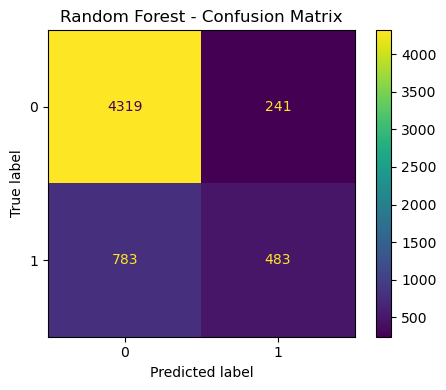

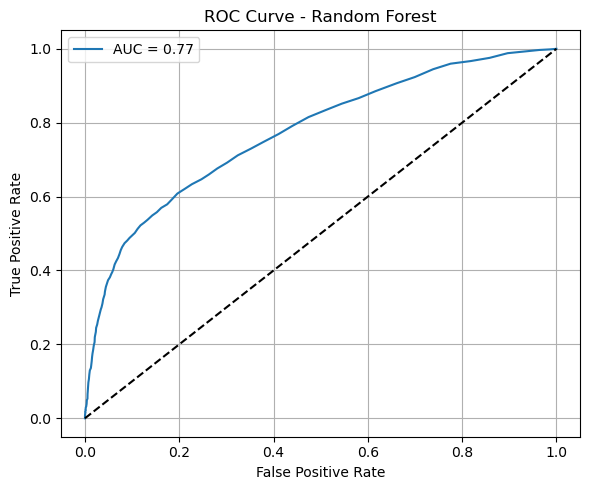

In [43]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Apply SMOTE to training data for Random Forest
from imblearn.over_sampling import SMOTE

# Resample with SMOTE
smote = SMOTE(random_state=42)
X_train_rf_smote, y_train_rf_smote = smote.fit_resample(X_train, y_train)

# Scale resampled data
scaler_rf_smote = StandardScaler()
X_train_rf_smote_scaled = scaler_rf_smote.fit_transform(X_train_rf_smote)
X_test_rf_scaled = scaler_rf_smote.transform(X_test)

# Train Random Forest on SMOTE data
rf_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote_model.fit(X_train_rf_smote_scaled, y_train_rf_smote)

# Predict and evaluate
y_pred_rf_smote = rf_smote_model.predict(X_test_rf_scaled)
y_proba_rf_smote = rf_smote_model.predict_proba(X_test_rf_scaled)[:, 1]

accuracy_rf_smote = rf_smote_model.score(X_test_rf_scaled, y_test)
report_rf_smote = classification_report(y_test, y_pred_rf_smote)
auc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)

print("Accuracy:", accuracy_rf_smote)
print("AUC Score:", auc_rf_smote)
print("\nClassification Report:\n", report_rf_smote)
print("\nConfusion Matrix:\n", cm_rf_smote)

Accuracy: 0.8029522828698936
AUC Score: 0.7666934293672572

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4560
           1       0.55      0.51      0.53      1266

    accuracy                           0.80      5826
   macro avg       0.71      0.70      0.70      5826
weighted avg       0.80      0.80      0.80      5826


Confusion Matrix:
 [[4036  524]
 [ 624  642]]


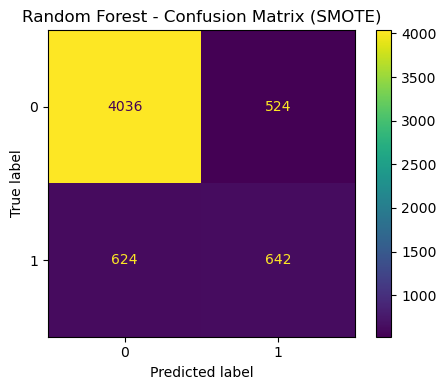

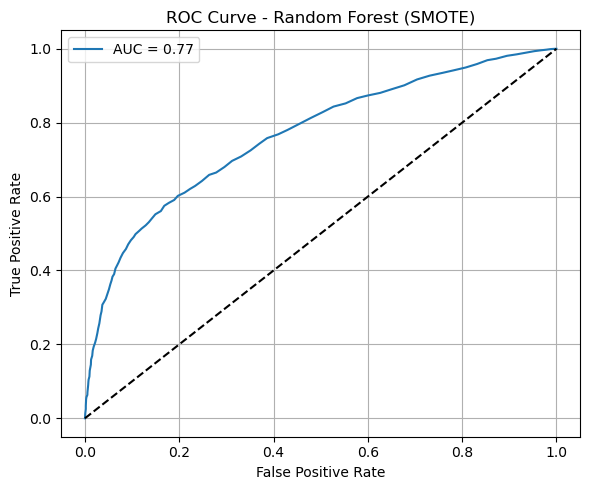

In [47]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_smote, display_labels=rf_smote_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Random Forest - Confusion Matrix (SMOTE)")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf_smote)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train XGBoost on non-SMOTE scaled data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_xgb = xgb_model.score(X_test_scaled, y_test)
report_xgb = classification_report(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("AUC Score:", auc_xgb)
print("\nClassification Report:\n", report_xgb)
print("\nConfusion Matrix:\n", cm_xgb)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8230346721592859
AUC Score: 0.770364336492891

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4560
           1       0.65      0.39      0.49      1266

    accuracy                           0.82      5826
   macro avg       0.75      0.67      0.69      5826
weighted avg       0.81      0.82      0.81      5826


Confusion Matrix:
 [[4298  262]
 [ 769  497]]


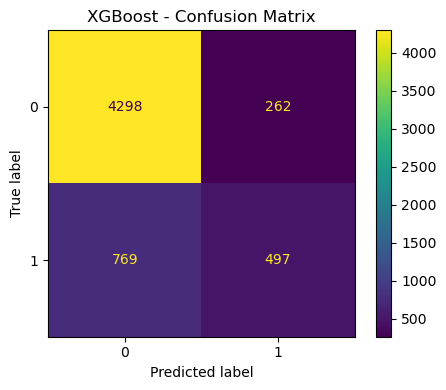

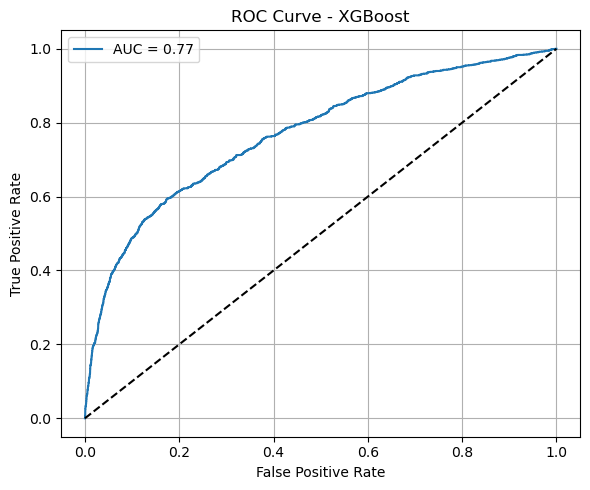

In [51]:
# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("XGBoost - Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_xgb_smote, y_train_xgb_smote = smote.fit_resample(X_train, y_train)

# Scale SMOTE data
scaler_xgb_smote = StandardScaler()
X_train_xgb_smote_scaled = scaler_xgb_smote.fit_transform(X_train_xgb_smote)
X_test_xgb_scaled = scaler_xgb_smote.transform(X_test)

# Train XGBoost on SMOTE data
xgb_smote_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote_model.fit(X_train_xgb_smote_scaled, y_train_xgb_smote)

# Predict and evaluate
y_pred_xgb_smote = xgb_smote_model.predict(X_test_xgb_scaled)
y_proba_xgb_smote = xgb_smote_model.predict_proba(X_test_xgb_scaled)[:, 1]

accuracy_xgb_smote = xgb_smote_model.score(X_test_xgb_scaled, y_test)
report_xgb_smote = classification_report(y_test, y_pred_xgb_smote)
auc_xgb_smote = roc_auc_score(y_test, y_proba_xgb_smote)
cm_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)

print("Accuracy:", accuracy_xgb_smote)
print("AUC Score:", auc_xgb_smote)
print("\nClassification Report:\n", report_xgb_smote)
print("\nConfusion Matrix:\n", cm_xgb_smote)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:30:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.779780295228287
AUC Score: 0.7431438118400265

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4560
           1       0.49      0.48      0.49      1266

    accuracy                           0.78      5826
   macro avg       0.68      0.67      0.67      5826
weighted avg       0.78      0.78      0.78      5826


Confusion Matrix:
 [[3931  629]
 [ 654  612]]


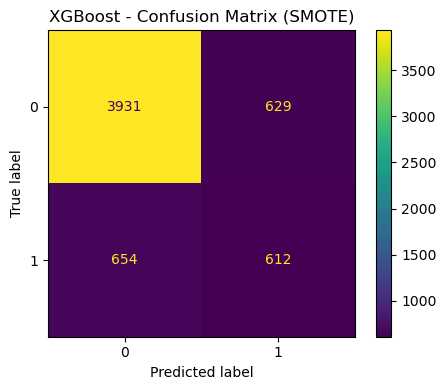

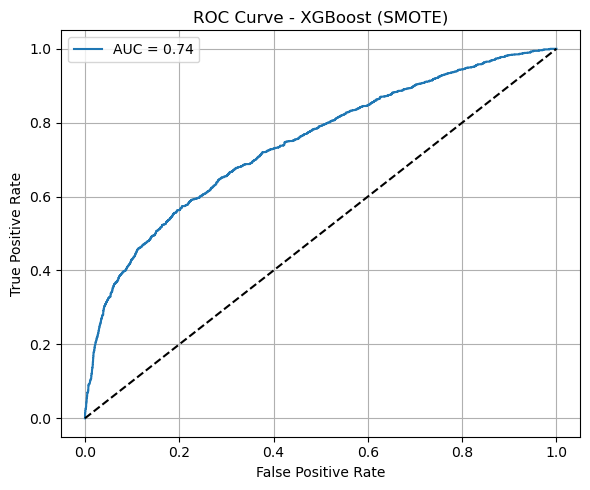

In [55]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_smote, display_labels=xgb_smote_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("XGBoost - Confusion Matrix (SMOTE)")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb_smote)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN on non-SMOTE scaled data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_knn = knn_model.score(X_test_scaled, y_test)
report_knn = classification_report(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("AUC Score:", auc_knn)
print("\nClassification Report:\n", report_knn)
print("\nConfusion Matrix:\n", cm_knn)

Accuracy: 0.8051836594576038
AUC Score: 0.7115056227654445

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      4560
           1       0.58      0.36      0.45      1266

    accuracy                           0.81      5826
   macro avg       0.71      0.65      0.66      5826
weighted avg       0.78      0.81      0.79      5826


Confusion Matrix:
 [[4233  327]
 [ 808  458]]


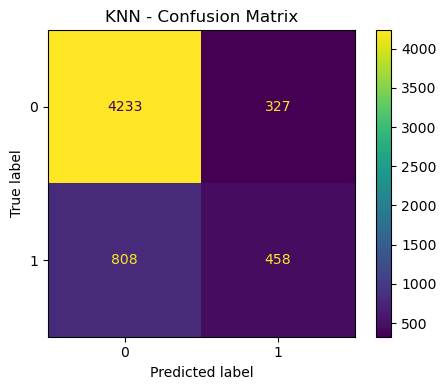

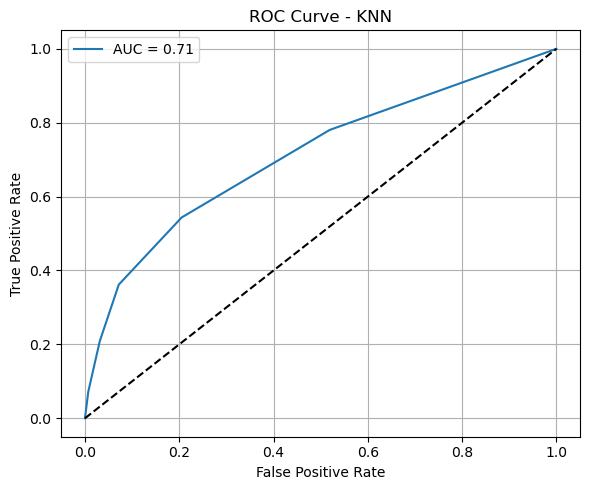

In [59]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("KNN - Confusion Matrix")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_knn:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
# apply SMOTE
smote = SMOTE(random_state=42)
X_train_knn_smote, y_train_knn_smote = smote.fit_resample(X_train, y_train)

# Scale data
scaler_knn = StandardScaler()
X_train_knn_smote_scaled = scaler_knn.fit_transform(X_train_knn_smote)
X_test_knn_scaled = scaler_knn.transform(X_test)

# Train KNN on SMOTE data
knn_smote_model = KNeighborsClassifier(n_neighbors=5)
knn_smote_model.fit(X_train_knn_smote_scaled, y_train_knn_smote)

# Predict and evaluate
y_pred_knn_smote = knn_smote_model.predict(X_test_knn_scaled)
y_proba_knn_smote = knn_smote_model.predict_proba(X_test_knn_scaled)[:, 1]

accuracy_knn_smote = knn_smote_model.score(X_test_knn_scaled, y_test)
report_knn_smote = classification_report(y_test, y_pred_knn_smote)
auc_knn_smote = roc_auc_score(y_test, y_proba_knn_smote)
cm_knn_smote = confusion_matrix(y_test, y_pred_knn_smote)

print("Accuracy:", accuracy_knn_smote)
print("AUC Score:", auc_knn_smote)
print("\nClassification Report:\n", report_knn_smote)
print("\nConfusion Matrix:\n", cm_knn_smote)

Accuracy: 0.7119807758324751
AUC Score: 0.7004703826113468

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      4560
           1       0.39      0.57      0.46      1266

    accuracy                           0.71      5826
   macro avg       0.63      0.66      0.63      5826
weighted avg       0.76      0.71      0.73      5826


Confusion Matrix:
 [[3425 1135]
 [ 543  723]]


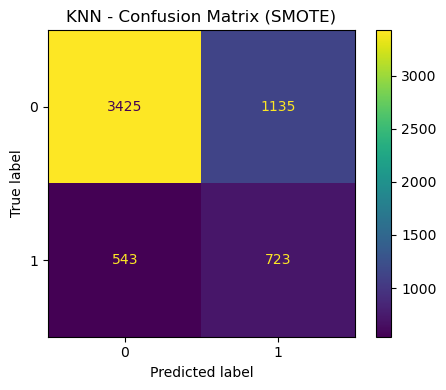

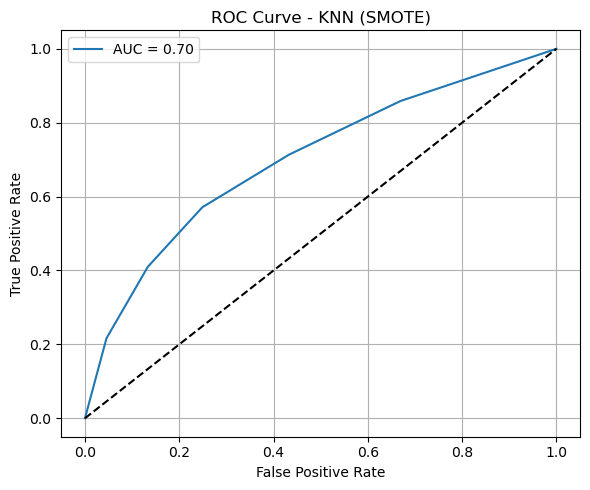

In [63]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn_smote, display_labels=knn_smote_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("KNN - Confusion Matrix (SMOTE)")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn_smote)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_knn_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network on original non-SMOTE scaled data
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_nn = nn_model.predict(X_test_scaled)
y_proba_nn = nn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
accuracy_nn = nn_model.score(X_test_scaled, y_test)
report_nn = classification_report(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_proba_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)

print("Accuracy:", accuracy_nn)
print("AUC Score:", auc_nn)
print("\nClassification Report:\n", report_nn)
print("\nConfusion Matrix:\n", cm_nn)

Accuracy: 0.8135942327497425
AUC Score: 0.7689193238823757

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4560
           1       0.61      0.40      0.48      1266

    accuracy                           0.81      5826
   macro avg       0.73      0.67      0.69      5826
weighted avg       0.80      0.81      0.80      5826


Confusion Matrix:
 [[4230  330]
 [ 756  510]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


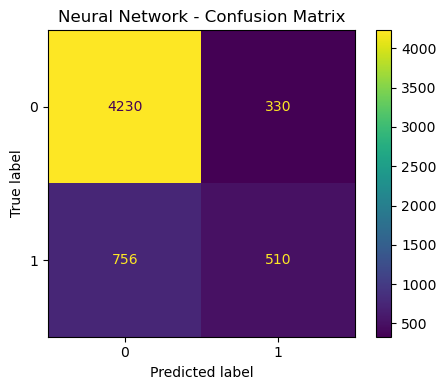

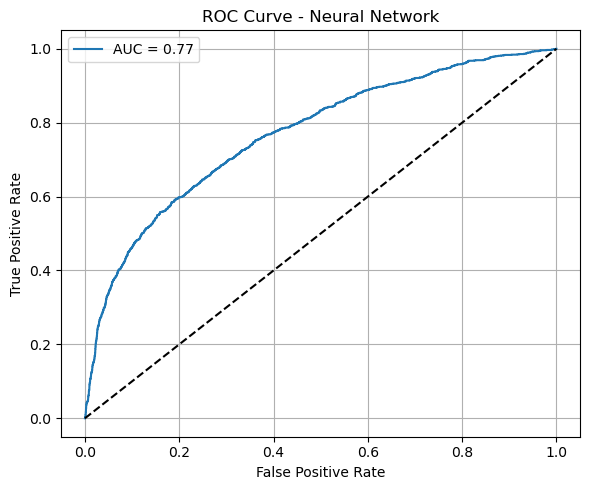

In [67]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=nn_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Neural Network - Confusion Matrix")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_nn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_nn:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
# Apply SMOTE for Neural Network
smote = SMOTE(random_state=42)
X_train_nn_smote, y_train_nn_smote = smote.fit_resample(X_train, y_train)

# Scale the data
scaler_nn_smote = StandardScaler()
X_train_nn_smote_scaled = scaler_nn_smote.fit_transform(X_train_nn_smote)
X_test_nn_scaled = scaler_nn_smote.transform(X_test)

# Train Neural Network on SMOTE data
nn_smote_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_smote_model.fit(X_train_nn_smote_scaled, y_train_nn_smote)

# Predict and evaluate
y_pred_nn_smote = nn_smote_model.predict(X_test_nn_scaled)
y_proba_nn_smote = nn_smote_model.predict_proba(X_test_nn_scaled)[:, 1]

accuracy_nn_smote = nn_smote_model.score(X_test_nn_scaled, y_test)
report_nn_smote = classification_report(y_test, y_pred_nn_smote)
auc_nn_smote = roc_auc_score(y_test, y_proba_nn_smote)
cm_nn_smote = confusion_matrix(y_test, y_pred_nn_smote)

print("Accuracy:", accuracy_nn_smote)
print("AUC Score:", auc_nn_smote)
print("\nClassification Report:\n", report_nn_smote)
print("\nConfusion Matrix:\n", cm_nn_smote)

Accuracy: 0.7380707174733951
AUC Score: 0.7255779530777973

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      4560
           1       0.42      0.54      0.47      1266

    accuracy                           0.74      5826
   macro avg       0.64      0.67      0.65      5826
weighted avg       0.77      0.74      0.75      5826


Confusion Matrix:
 [[3615  945]
 [ 581  685]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


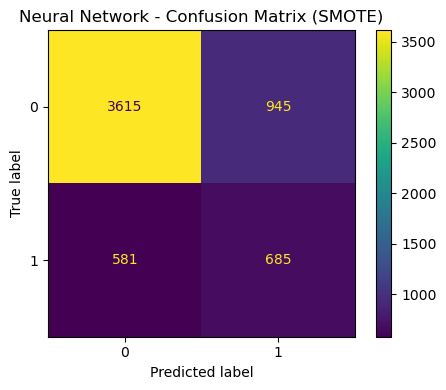

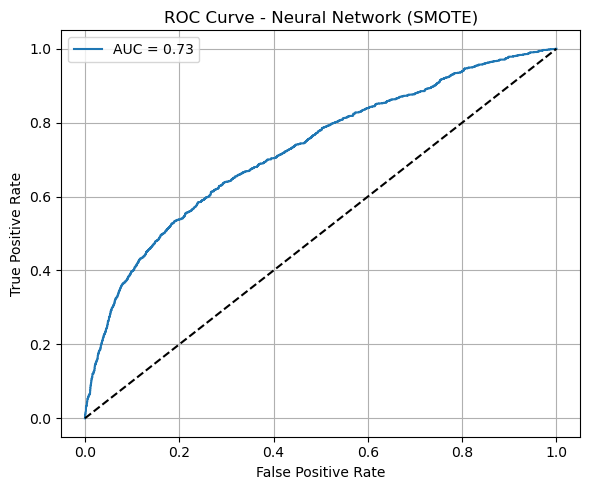

In [71]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn_smote, display_labels=nn_smote_model.classes_)
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Neural Network - Confusion Matrix (SMOTE)")
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_nn_smote)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_nn_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
# performance table
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression", "Logistic + SMOTE",
        "Decision Tree", "Decision Tree + SMOTE",
        "Random Forest", "Random Forest + SMOTE",
        "XGBoost", "XGBoost + SMOTE",
        "KNN", "KNN + SMOTE",
        "Neural Network", "Neural Network + SMOTE"
    ],
    "Accuracy": [
        0.8180, 0.7360,
        0.7310, 0.6889,
        0.8242, 0.8029,
        0.8230, 0.7797,
        0.8051, 0.7119,
        0.8135, 0.7814
    ],
    "Recall (1)": [
        0.32, 0.62,
        0.41, 0.50,
        0.38, 0.51,
        0.39, 0.48,
        0.36, 0.57,
        0.40, 0.50
    ],
    "F1 Score (1)": [
        0.44, 0.51,
        0.40, 0.41,
        0.49, 0.53,
        0.49, 0.49,
        0.45, 0.46,
        0.48, 0.50
    ],
    "AUC": [
        0.77, 0.74,
        0.61, 0.62,
        0.78, 0.77,
        0.77, 0.74,
        0.71, 0.70,
        0.768, 0.736
    ]
})
model_comparison

,Model,Accuracy,Recall (1),F1 Score (1),AUC
0,Logistic Regression,0.8180,0.32,0.44,0.770
1,Logistic + SMOTE,0.7360,0.62,0.51,0.740
2,Decision Tree,0.7310,0.41,0.40,0.610
3,Decision Tree + SMOTE,0.6889,0.50,0.41,0.620
4,Random Forest,0.8242,0.38,0.49,0.780
5,Random Forest + SMOTE,0.8029,0.51,0.53,0.770
6,XGBoost,0.8230,0.39,0.49,0.770
7,XGBoost + SMOTE,0.7797,0.48,0.49,0.740
8,KNN,0.8051,0.36,0.45,0.710
9,KNN + SMOTE,0.7119,0.57,0.46,0.700


/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_18584/520071391.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart_df, x=metric, y="Model", ax=ax, palette="Blues_d")
/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_18584/520071391.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart_df, x=metric, y="Model", ax=ax, palette="Blues_d")
/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_18584/520071391.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart_df, x=metric, y="Model", ax=

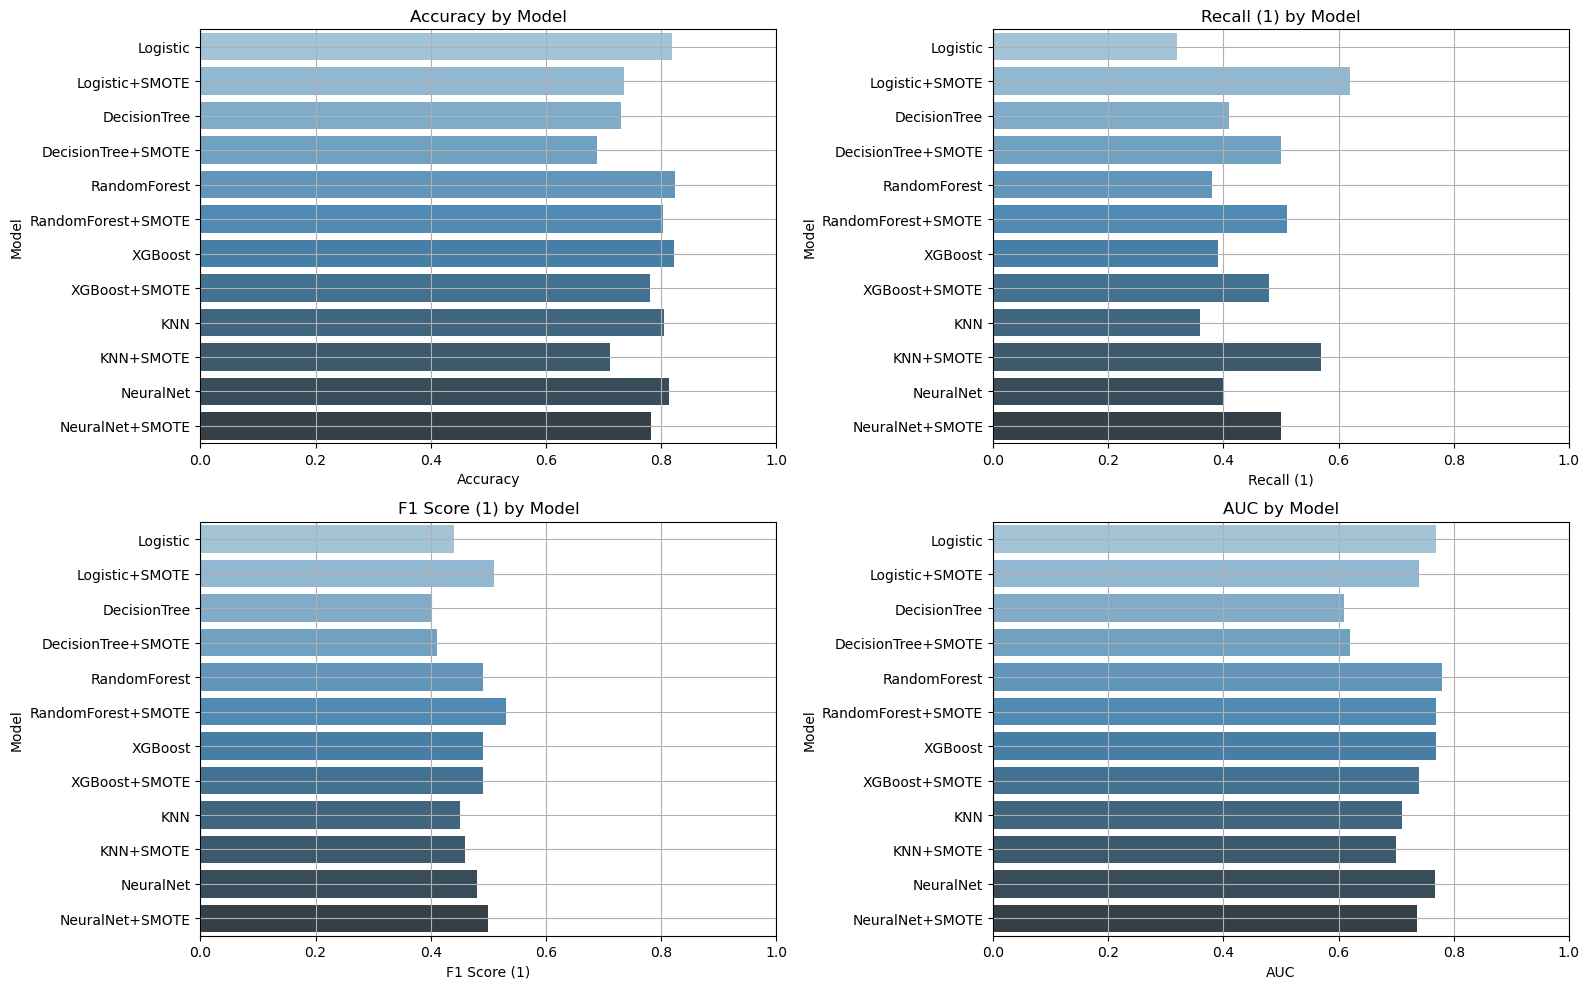

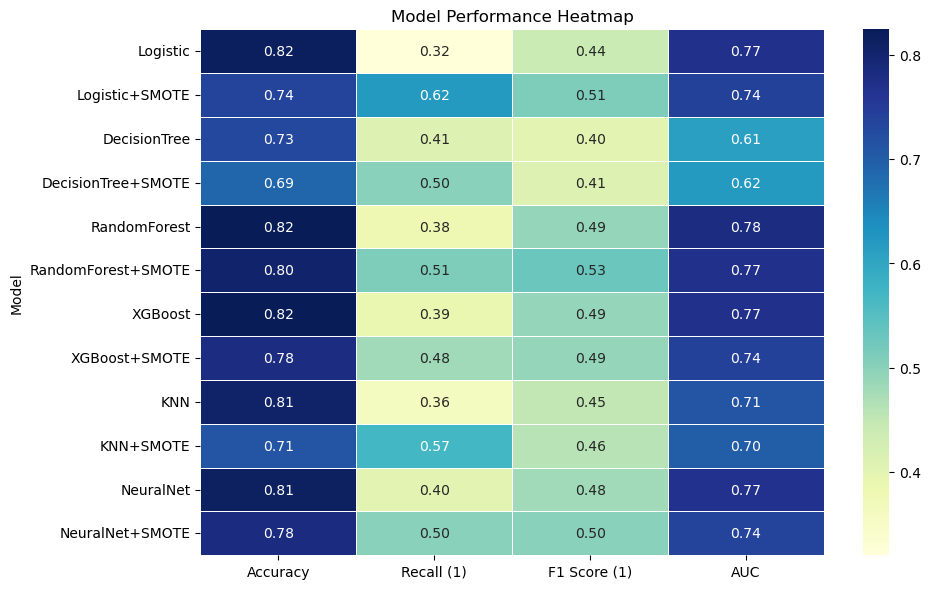

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model comparison data
comparison_data = {
    "Model": [
        "Logistic", "Logistic+SMOTE",
        "DecisionTree", "DecisionTree+SMOTE",
        "RandomForest", "RandomForest+SMOTE",
        "XGBoost", "XGBoost+SMOTE",
        "KNN", "KNN+SMOTE",
        "NeuralNet", "NeuralNet+SMOTE"
    ],
    "Accuracy": [
        0.8180, 0.7360,
        0.7310, 0.6889,
        0.8242, 0.8029,
        0.8230, 0.7797,
        0.8051, 0.7119,
        0.8135, 0.7814
    ],
    "Recall (1)": [
        0.32, 0.62,
        0.41, 0.50,
        0.38, 0.51,
        0.39, 0.48,
        0.36, 0.57,
        0.40, 0.50
    ],
    "F1 Score (1)": [
        0.44, 0.51,
        0.40, 0.41,
        0.49, 0.53,
        0.49, 0.49,
        0.45, 0.46,
        0.48, 0.50
    ],
    "AUC": [
        0.77, 0.74,
        0.61, 0.62,
        0.78, 0.77,
        0.77, 0.74,
        0.71, 0.70,
        0.768, 0.736
    ]
}

# Create DataFrame
chart_df = pd.DataFrame(comparison_data)

# Bar plot
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
metrics = ["Accuracy", "Recall (1)", "F1 Score (1)", "AUC"]

for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    sns.barplot(data=chart_df, x=metric, y="Model", ax=ax, palette="Blues_d")
    ax.set_title(f"{metric} by Model")
    ax.set_xlim(0, 1)
    ax.grid(True)

plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(10, 6))
heatmap_data = chart_df.set_index("Model")
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.title("Model Performance Heatmap")
plt.tight_layout()
plt.show()

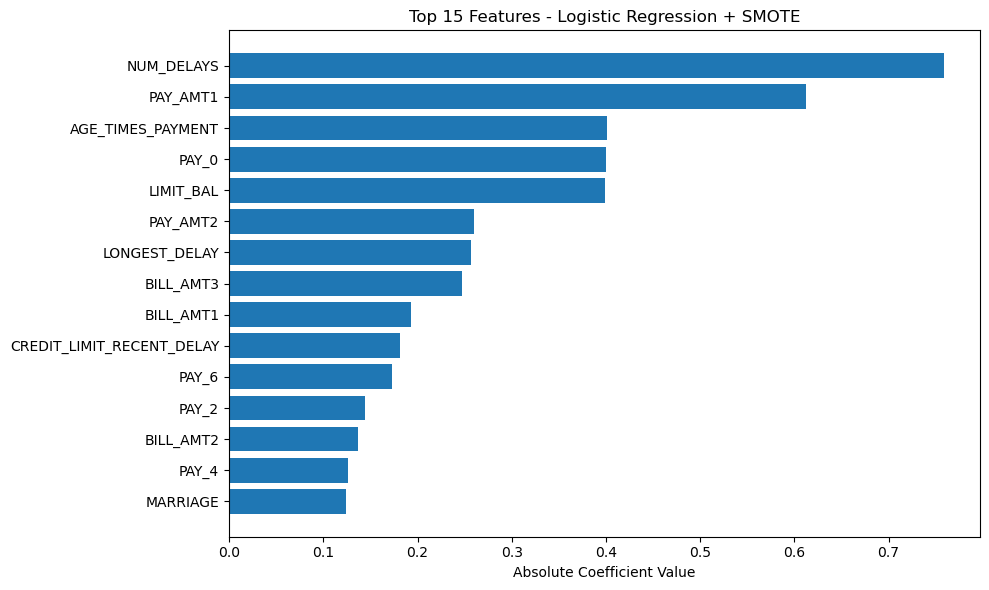

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# 4. Fit logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_resampled, y_resampled)

# 5. Get coefficients and feature names
coefs = logreg.coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'AbsCoefficient': np.abs(coefs)
}).sort_values(by='AbsCoefficient', ascending=False)

# 6. Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15], importance_df['AbsCoefficient'][:15])
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 15 Features - Logistic Regression + SMOTE")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [201]:
print("Shape of model coefficients:", log_model_smote.coef_.shape)
print("Number of features:", X_train_smote.shape[1])
print("Feature names match:", X_train_smote.shape[1] == len(X_train_smote.columns))


Shape of model coefficients: (1, 31)
Number of features: 31
Feature names match: True


/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_18584/990236600.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_rf.values, y=importance_rf.index, palette="GnBu_d")


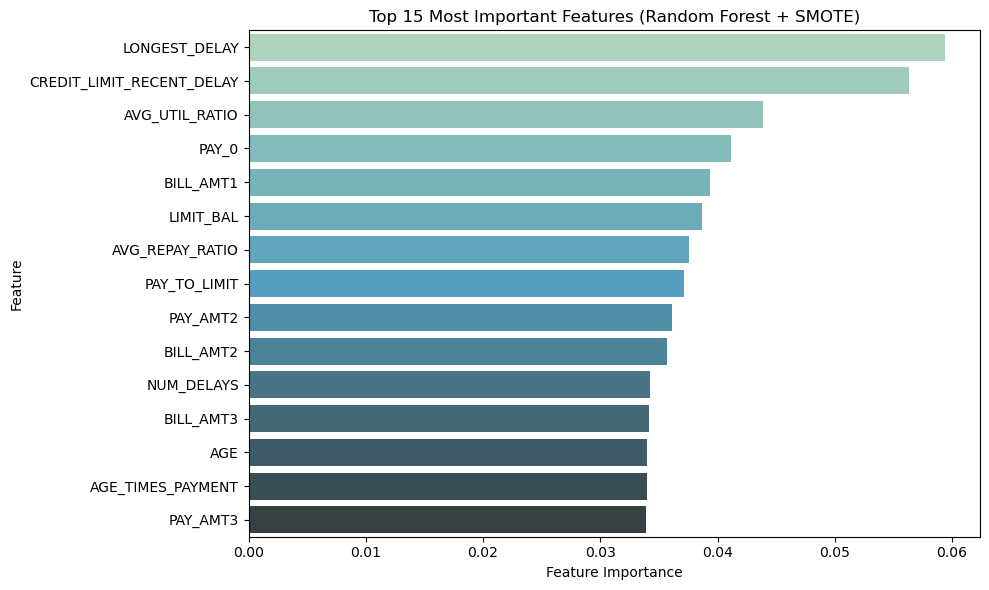

In [211]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Drop ID
X = X.drop(columns=['ID'], errors='ignore')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_train_rf_smote, y_train_rf_smote = smote.fit_resample(X_train, y_train)

X_train_rf_smote = X_train_rf_smote.drop(columns=['ID'], errors='ignore')
X_test = X_test.drop(columns=['ID'], errors='ignore')

# Scale
scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf_smote)
X_test_rf_scaled = scaler_rf.transform(X_test)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_scaled, y_train_rf_smote)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from trained Random Forest model
importances_rf = rf_model.feature_importances_

# Make sure the feature names match
feature_names_rf = X_train_rf_smote.columns  

# Create a DataFrame for feature importance
importance_rf = pd.Series(importances_rf, index=feature_names_rf)
importance_rf = importance_rf.sort_values(ascending=False).head(15)

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_rf.values, y=importance_rf.index, palette="GnBu_d")
plt.title("Top 15 Most Important Features (Random Forest + SMOTE)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:03:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/var/folders/qn/dwvxp6vn44x47pp4nz5_8q9h0000gn/T/ipykernel_18584/2712344283.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances.values, y=xgb_importances.index, palette="crest")


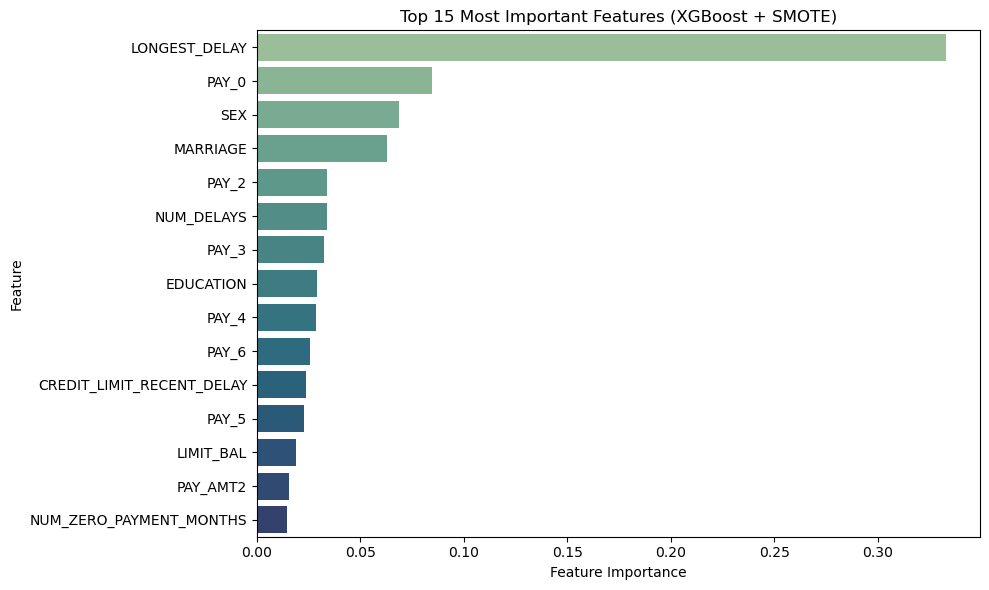

In [213]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

xgb_smote_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    booster='gbtree', 
    random_state=42
)
xgb_smote_model.fit(X_train_xgb_smote_scaled, y_train_xgb_smote)

# Extract feature importances
feature_names = X_train.columns
xgb_importances = pd.Series(
    xgb_smote_model.feature_importances_, 
    index=feature_names
).sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index, palette="crest")
plt.title("Top 15 Most Important Features (XGBoost + SMOTE)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
//////////////////////////////////////////////////////////////////////////////////////////////////

In [218]:
# Hyperparameter Tuning for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define pipeline
pipeline_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])
# Define hyperparameter grid
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall', 
    n_jobs=-1,
    verbose=2
)

# Fit on training data 
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_rf.best_params_)

# Predict on test data
y_pred_rf_tuned = grid_rf.predict(X_test)
y_proba_rf_tuned = grid_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))
print("AUC Score:", roc_auc_score(y_test, y_proba_rf_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      4560
           1       0.53      0.58      0.55      1266

    accuracy                           0.80      5826
   macro avg       0.71      0.72      0.71      5826
weighted avg       0.80      0.80      0.80      5826

AUC Score: 0.7779987216263407
Confusion Matrix:
 [[3910  650]
 [ 532  734]]


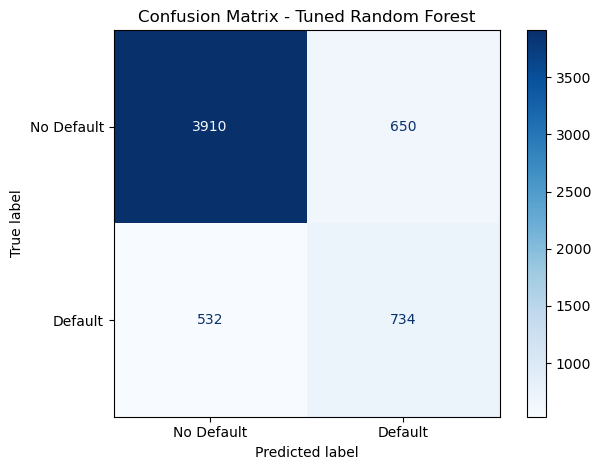

In [228]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned, display_labels=["No Default", "Default"])
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix - Tuned Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()

In [220]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define pipeline
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Define hyperparameters
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['liblinear', 'lbfgs']
}

# Setup GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Best model and evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Output
print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      4560
           1       0.42      0.62      0.50      1266

    accuracy                           0.74      5826
   macro avg       0.65      0.69      0.66      5826
weighted avg       0.78      0.74      0.75      5826

AUC Score: 0.7400985802777085
Confusion Matrix:
 [[3500 1060]
 [ 483  783]]


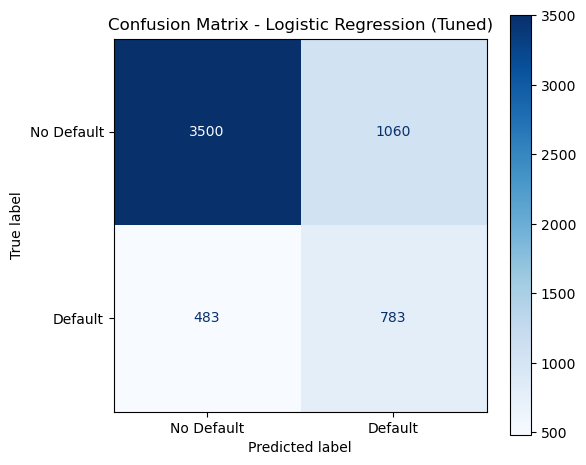

In [234]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.grid(False)
plt.tight_layout()
plt.show()
